<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.3.1 
# *Support Vector Machines*

SVMs use linear algebra to find an (n-1)-dimensional boundary that separates classes within an n-dimensional space. In practical terms, this technique provides a conceptually simple way to predict class membership from a set of features. 

The standard (linear) SVM is immediately applicable to linear classification problems. Furthermore, by applying transformations to the feature space it is possible to tackle nonlinear classificaiton problems. These transforms are called *kernels*.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.naive_bayes import GaussianNB


In [2]:
bc = pd.read_csv('breast-cancer-wisconsin-data.csv', index_col = 'id')

### 2. EDA 

- Explore dataset. Clean data (if required)
- Find features to predict class

In [3]:
bc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
bc = bc.drop(['Unnamed: 32'], axis = 1,)

In [5]:
bc.shape

(569, 31)

In [6]:
bc['diagnosis'].value_counts(normalize = False)

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

<AxesSubplot:>

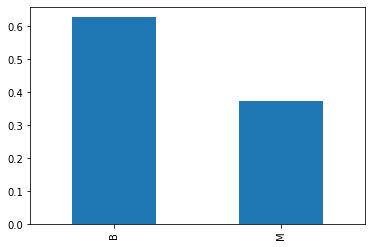

In [8]:
bc.diagnosis.value_counts(normalize = True).plot(kind='bar')

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [9]:
target_col = 'diagnosis'
feature_cols = [c for c in bc.columns if c != target_col]

In [10]:
feature_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [12]:
X = bc[feature_cols]
y = bc[target_col]

#Applying StandardScaler()
#object = StandardScaler()
#scale = object.fit_transform(X) 
#print(scale)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.945054945054945
Test score:  0.9473684210526315


C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9473684210526315
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



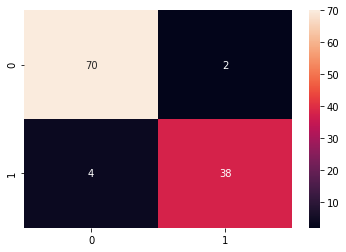

In [13]:
y_pred = logreg.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred, labels=None)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred))

### 4. Support Vector Machine

#### 4.1 Use Support Vector Machine

Use Support Vector Machine and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [14]:
target_col = 'diagnosis'
feature_cols = [c for c in bc.columns if c!= target_col]

X = bc[feature_cols]
y = bc[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

svc_model = SVC(kernel='linear', probability=True)

svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

0.9440559440559441

Accuracy:  0.9440559440559441
              precision    recall  f1-score   support

           B       0.94      0.97      0.96        88
           M       0.94      0.91      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



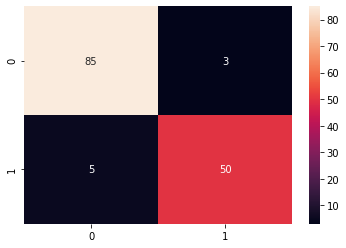

In [15]:
y_pred = svc_model.predict(X_test)

ac = accuracy_score(y_test, y_pred)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_pred, labels=None)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_pred))

### 5. Naive Bayes
#### 5.1 Use Naive Bayes

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

In [16]:
X = bc[feature_cols]
y = bc[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

modelNB = GaussianNB()

modelNB.fit(X_train, y_train)

train_score = modelNB.score(X_train, y_train)
test_score = modelNB.score(X_test, y_test)

print("Training score: ", train_score)
print("Test score: ", test_score)

Training score:  0.9406593406593406
Test score:  0.9473684210526315


Accuracy:  0.9473684210526315
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        72
           M       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



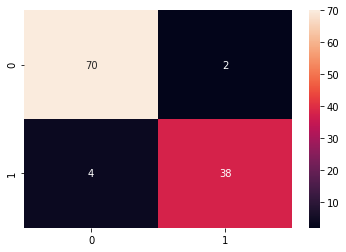

In [17]:
y_predNB = modelNB.predict(X_test)

ac = accuracy_score(y_test, y_predNB)
print("Accuracy: ", ac)

cm = confusion_matrix(y_test, y_predNB)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, y_predNB))

### 6 Gridsearch optimal parameters for all three models.

Is there any difference between accuracy score of Logistic Regression and SVM? Use grid serach to find optimal parameter for both these models.

> Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

> It is possible and recommended to search the hyper-parameter space for the best cross validation score.

> https://scikit-learn.org/stable/modules/grid_search.html#grid-search

**Note:** It'll take time to execute this. After running the cell, wait for result.

#### 6.1 Find Best Estimator For Logistic Regression 

Find out how these parameters effect model. Find out the best estimator, score.

In [18]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}
lr_gs = GridSearchCV(estimator = LogisticRegression(), param_grid = lr_params, cv=5, verbose=1, n_jobs=-1)
lr_gs.fit(X, y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.94027325        nan 0.93496351        nan 0.94730632]
  warnings.warn(
C:\Users\matt\.conda\envs\Python 38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=1)

In [19]:
best_svc = lr_gs.best_estimator_
print(lr_gs.best_params_)
print(lr_gs.best_score_)

{'C': 100, 'penalty': 'l2'}
0.9473063188945815


#### 6.2 Find Best Estimator For SVM

Find out how these parameters effect model. Find out the best estimator, score.

In [20]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [21]:
svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=1, n_jobs=-1)
svc_gs.fit(X, y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [22]:
best_svc = svc_gs.best_estimator_
print(svc_gs.best_params_)
print(svc_gs.best_score_)

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
0.9560937742586555


#### 6.3 Plot the ROC curve for the SVM, Logistic Regressions and Naive Bayes on the same plot

Find out which model performs better.

In [25]:
from sklearn.metrics import roc_curve, auc

In [28]:
Y_pp = pd.DataFrame(logreg.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_pp.head(10)

,class_B_pp,class_M_pp
0,0.654807,0.345193
1,0.328922,0.671078
2,0.996148,0.003852
3,0.001714,0.998286
4,0.261309,0.738691
5,0.001379,0.998621
6,0.000026,0.999974
7,0.019173,0.980827
8,0.976347,0.023653
9,0.989153,0.010847


In [57]:
Y_svc = pd.DataFrame(svc_model.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_svc.head(10)

,class_B_pp,class_M_pp
0,0.568919,0.431081
1,0.364450,0.635550
2,0.985559,0.014441
3,0.092656,0.907344
4,0.305483,0.694517
5,0.015936,0.984064
6,0.037841,0.962159
7,0.266030,0.733970
8,0.989236,0.010764
9,0.957957,0.042043


In [58]:
Y_NB = pd.DataFrame(modelNB.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_NB.head(10)

,class_B_pp,class_M_pp
0,4.510950e-06,9.999955e-01
1,9.802603e-03,9.901974e-01
2,1.000000e+00,1.844280e-12
3,1.133524e-16,1.000000e+00
4,9.966653e-01,3.334654e-03
5,2.120977e-10,1.000000e+00
6,1.692994e-67,1.000000e+00
7,3.495245e-22,1.000000e+00
8,1.000000e+00,8.793629e-16
9,1.000000e+00,5.661945e-10


In [59]:
fpr, tpr, _ = roc_curve(y_test, Y_pp['class_M_pp'], pos_label='M')
roc_auc = auc(fpr, tpr)

In [60]:
fpr_svc, tpr_svc, _ = roc_curve(y_test, Y_svc['class_M_pp'], pos_label='M')
roc_aucsvc = auc(fpr_svc, tpr_svc)

In [61]:
fpr_NB, tpr_NB, _ = roc_curve(y_test, Y_NB['class_M_pp'], pos_label='M')
roc_aucNB = auc(fpr_NB, tpr_NB)

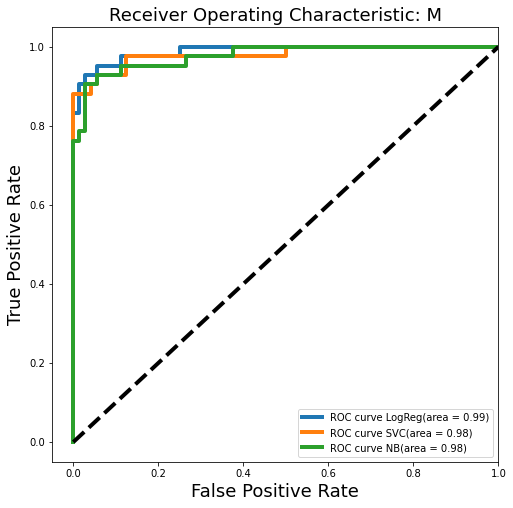

In [62]:
plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve LogReg(area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC(area = %0.2f)' % roc_aucsvc, linewidth=4)
plt.plot(fpr_NB, tpr_NB, label='ROC curve NB(area = %0.2f)' % roc_aucNB, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 7. [BONUS] Learning Curve

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

In [43]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

In [46]:
train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
train_sizes

train_scores



#valid_score

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.97272727, 1.        , 0.99090909, 0.99090909, 0.99090909]])

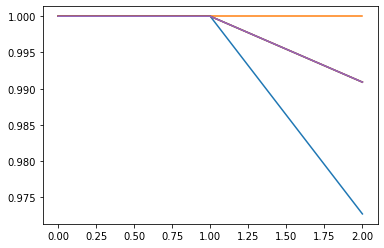

In [50]:
plt.plot(train_scores)

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)

[In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

[Understanding Support Vector Machine algorithm from examples (along with code)](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

[Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



